In [5]:
import sys
sys.path.insert(0, '/cndd/fangming/CEMBA/snmcseq_dev')

from __init__ import *
from __init__jupyterlab import *

import snmcseq_utils

In [7]:
# my clusters
f = '/cndd/fangming/CEMBA/data/MOp_all/results_final/miniatlas_joint_clusterings.tsv'
df = pd.read_csv(f, sep='\t', index_col=0)
df['cell_id'] = df.index.values
df['joint_cluster_round1'] = df['joint_cluster_round2'].apply(lambda x: x.split('-')[0])

# zizhen clusters
f = '/cndd/fangming/CEMBA/data/MOp_all/zizhen_integration/cluster.membership.csv'
df_rna = pd.read_csv(f, index_col=0)
f = '/cndd/fangming/CEMBA/data/MOp_all/zizhen_integration/cluster.annotation.csv'
df_rna_annot = pd.read_csv(f, index_col=0)

# zizhen clusters 10x v2
f = '/cndd/fangming/CEMBA/data/MOp_all/zizhen_integration/cluster.membership.csv'
df_rna = pd.read_csv(f, index_col=0)
f = '/cndd/fangming/CEMBA/data/MOp_all/zizhen_integration/cluster.annotation.csv'
df_rna_annot = pd.read_csv(f, index_col=0)

print(df.shape, df_rna.shape, df_rna_annot.shape)
df_rna_annot.head()


/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(408885, 16) (482712, 1) (116, 11)


,cluster_label,cluster_color,subclass_id,subclass_label,subclass_color,class_id,class_label,class_color,cl,cluster_size,size
cluster_id,,,,,,,,,,,
1,Lamp5 Pax6,#DDACC9,1,Lamp5,#DA808C,1,GABAergic,#F05A28,1,700,700
2,Lamp5 Egln3_1,#FF88AD,1,Lamp5,#DA808C,1,GABAergic,#F05A28,2,618,618
3,Lamp5 Egln3_2,#DD8091,1,Lamp5,#DA808C,1,GABAergic,#F05A28,3,814,814
4,Lamp5 Egln3_3,#F08E98,1,Lamp5,#DA808C,1,GABAergic,#F05A28,4,1276,1276
5,Lamp5 Pdlim5_1,#FF7290,1,Lamp5,#DA808C,1,GABAergic,#F05A28,5,1288,1288


In [8]:
# annot_round1 = {
#     '1': 'exc',
#     '10': 'inh',
#     '2': 'exc',
#     '3': 'exc',
#     '4': 'exc',
#     '5': 'inh',
#     '6': 'inh',
#     '7': 'exc', 
#     '8': 'exc', 
#     '9': 'exc',
# }
# df['class_label'] = df['joint_cluster_round1'].apply(lambda x: annot_round1[x]) 
# print(df.shape)
# df.head()

In [9]:
# df.groupby(['modality', 'class_label']).size()
# df.groupby(['modality']).size()

In [10]:
modality_map = {
    'SmartSeq_cells_AIBS': 'smarter_cells', 
    'SmartSeq_nuclei_AIBS': 'smarter_nuclei',
    '10X_cells_v2_AIBS': '10x_cells_v2', 
    '10X_cells_v3_AIBS': '10x_cells_v3', 
    '10X_nuclei_v3_AIBS': '10x_nuclei_v3',
    '10X_nuclei_v3_Broad': '10x_nuclei_v3_macosko',
    '10X_nuclei_v2_AIBS': '10x_nuclei_v2',
    }

df_rna['modality_allen'] = df_rna.reset_index()['index'].apply(lambda x: x.split('.')[0]).values
df_rna['cell'] = df_rna.reset_index()['index'].apply(lambda x: x.split('.')[1]).values
df_rna['modality'] = df_rna['modality_allen'].apply(lambda x: modality_map[x])
df_rna['cell_id'] = df_rna.apply(lambda x: x.modality + '_' + x.cell, axis=1)
df_rna = pd.merge(df_rna, df_rna_annot, left_on='x', right_on='cl')

df_rna.head()

,x,modality_allen,cell,modality,cell_id,cluster_label,cluster_color,subclass_id,subclass_label,subclass_color,class_id,class_label,class_color,cl,cluster_size,size
0,7,10X_cells_v2_AIBS,AAACCTGAGAAGGACA-5L8TX_171026_01_G04,10x_cells_v2,10x_cells_v2_AAACCTGAGAAGGACA-5L8TX_171026_01_G04,Lamp5 Slc35d3,#FFA388,1,Lamp5,#DA808C,1,GABAergic,#F05A28,7,6850,6850
1,7,10X_cells_v2_AIBS,AAACCTGAGAGACTTA-12L8TX_171026_01_D05,10x_cells_v2,10x_cells_v2_AAACCTGAGAGACTTA-12L8TX_171026_01...,Lamp5 Slc35d3,#FFA388,1,Lamp5,#DA808C,1,GABAergic,#F05A28,7,6850,6850
2,7,10X_cells_v2_AIBS,AAACCTGCAAGGACAC-4L8TX_171026_01_F04,10x_cells_v2,10x_cells_v2_AAACCTGCAAGGACAC-4L8TX_171026_01_F04,Lamp5 Slc35d3,#FFA388,1,Lamp5,#DA808C,1,GABAergic,#F05A28,7,6850,6850
3,7,10X_cells_v2_AIBS,AAACCTGCAGACGCTC-15L8TX_171026_01_G05,10x_cells_v2,10x_cells_v2_AAACCTGCAGACGCTC-15L8TX_171026_01...,Lamp5 Slc35d3,#FFA388,1,Lamp5,#DA808C,1,GABAergic,#F05A28,7,6850,6850
4,7,10X_cells_v2_AIBS,AAACCTGCAGATGGCA-11L8TX_171026_01_C05,10x_cells_v2,10x_cells_v2_AAACCTGCAGATGGCA-11L8TX_171026_01...,Lamp5 Slc35d3,#FFA388,1,Lamp5,#DA808C,1,GABAergic,#F05A28,7,6850,6850


In [11]:
for col in df_rna_annot:
    num = len(df_rna_annot[col].unique())
    print(col, num)

cluster_label 116
cluster_color 116
subclass_id 22
subclass_label 22
subclass_color 22
class_id 3
class_label 3
class_color 3
cl 116
cluster_size 113
size 113


In [16]:
df['modality'].value_counts().sort_index()

10x_cells_v2             121440
10x_cells_v3              69727
10x_nuclei_v3             39706
10x_nuclei_v3_macosko    101647
smarter_cells              6244
smarter_nuclei             5911
snatac_gene               54844
snmcseq_gene               9366
Name: modality, dtype: int64

In [17]:
# df.head()
df_rna['modality'].value_counts().sort_index()

10x_cells_v2             102792
10x_cells_v3              56055
10x_nuclei_v2             69381
10x_nuclei_v3             36260
10x_nuclei_v3_macosko    147867
smarter_cells              5644
smarter_nuclei             5794
Name: modality, dtype: int64

In [21]:
shared_cells = np.intersect1d(df['cell_id'].values, df_rna['cell_id'].values)
df_rna.set_index('cell_id').loc[shared_cells, 'modality'].value_counts().sort_index()

10x_cells_v2             101591
10x_cells_v3              54599
10x_nuclei_v3             35800
10x_nuclei_v3_macosko     89776
smarter_cells              5600
smarter_nuclei             5534
Name: modality, dtype: int64

In [22]:
df_comb = pd.DataFrame(index=shared_cells) 
df_comb['clst_rna'] = df_rna.set_index('cell_id').loc[shared_cells, 'cluster_label']
df_comb['clst_all'] = df.set_index('cell_id').loc[shared_cells, 'joint_cluster_round3']
print(df_comb.shape)
df_comb.head()

(292900, 2)


,clst_rna,clst_all
10x_cells_v2_AAACCTGAGAAGGACA-5L8TX_171026_01_G04,Lamp5 Slc35d3,6-2-1
10x_cells_v2_AAACCTGAGACTAAGT-10L8TX_171026_01_A04,L5 IT Rspo1_2,1-2-1
10x_cells_v2_AAACCTGAGAGACTTA-12L8TX_171026_01_D05,Lamp5 Slc35d3,6-2-1
10x_cells_v2_AAACCTGAGAGGTTAT-15L8TX_171026_01_G05,L5 IT S100b_1,3-2-1
10x_cells_v2_AAACCTGAGAGTCTGG-16L8TX_171026_01_H05,L5 ET_1,9-1-1


In [31]:
df_comb['clst_rna'].value_counts()

L6 CT Cpa6            53741
L5 IT Rspo1_1         47569
L5 IT Rspo1_2         34148
L5 IT S100b_1         22189
L5 IT Pld5_2          11666
L6 IT_1               11458
L5/6 NP_3              7093
Lamp5 Slc35d3          6093
L6b Col6a1             5566
L6 IT_2                5256
Pvalb Reln             4791
L5 IT Pld5_1           4208
L5 ET_1                4111
L2/3 IT_2              3431
Pvalb Vipr2_1          3401
Vip Gpc3               3064
Sst Myh8_1             2837
L5/6 NP_2              2497
L6b Ror1               2393
L5/6 NP_1              2349
L2/3 IT_1              2256
Vip Chat_1             2179
Lamp5 Pdlim5_2         1990
Sst Tac2               1910
Vip Htr1f_1            1801
Sst Th_1               1796
Vip Igfbp6_2           1717
Pvalb Calb1_2          1636
L6 CT Kit_1            1481
L6b Shisa6_1           1470
                      ...  
Pvalb Calb1_1           431
Sst Pvalb Etv1          410
Sst Myh8_2              371
Pvalb Il1rapl2          362
Sst Th_3            

In [33]:
f = '/cndd/fangming/CEMBA/data/MOp_all/results_final/annotation_auto.tsv'
df_auto_annot = df_comb.groupby('clst_all').agg({'clst_rna': lambda x: x.value_counts(ascending=False).index[0]})
# df_auto_annot.to_csv(f, sep='\t', header=True, index=True)

### Compare numbers 
Confusion matrix RNA vs integrated

In [235]:
rna_data = ['smarter_cells', 'smarter_nuclei',
       '10x_cells_v2', '10x_cells_v3', '10x_nuclei_v3',
       '10x_nuclei_v3_macosko']
rna_clusters = df_rna_annot[df_rna_annot['class_label']!='Non-Neuronal'].index.values

cells_rna = df_rna.loc[((df_rna['modality'].isin(rna_data)) & (df_rna['x'].isin(rna_clusters))), 'cell_id']
cells_rna_integrated = df.loc[df['modality'].isin(rna_data), 'cell_id']
n_rna = len(cells_rna)
n_rna_integrated = len(cells_rna_integrated)

print(n_rna, n_rna_integrated)
cells_rna_shared = np.intersect1d(cells_rna, cells_rna_integrated)
print(len(cells_rna_shared))

344650 344675
344628


In [236]:
X = pd.DataFrame(index=cells_rna_shared)
X['cluster'] = df.set_index('cell_id').loc[cells_rna_shared, 'joint_cluster_round3'].values
print(X.shape)
print(len(X['cluster'].unique()))
X.head()

(344628, 1)
56


,cluster
10x_cells_v2_AAACCTGAGAAGGACA-5L8TX_171026_01_G04,6-2-1
10x_cells_v2_AAACCTGAGAATCTCC-6L8TX_171026_01_B05,1-1-1
10x_cells_v2_AAACCTGAGACGACGT-2L8TX_171026_01_G03,1-1-1
10x_cells_v2_AAACCTGAGACTAAGT-10L8TX_171026_01_A04,1-2-1
10x_cells_v2_AAACCTGAGAGACTTA-12L8TX_171026_01_D05,6-2-1


In [237]:
Y = pd.DataFrame(index=cells_rna_shared)
Y['cluster'] = df_rna.set_index('cell_id').loc[cells_rna_shared, 'x'].values
print(Y.shape)
print(len(Y['cluster'].unique()))
Y.head()

(344628, 1)
90


,cluster
10x_cells_v2_AAACCTGAGAAGGACA-5L8TX_171026_01_G04,7
10x_cells_v2_AAACCTGAGAATCTCC-6L8TX_171026_01_B05,61
10x_cells_v2_AAACCTGAGACGACGT-2L8TX_171026_01_G03,61
10x_cells_v2_AAACCTGAGACTAAGT-10L8TX_171026_01_A04,62
10x_cells_v2_AAACCTGAGAGACTTA-12L8TX_171026_01_D05,7


In [238]:
mods_ordered = ['all_intg', 'rna_intg']

def plot_5_version2( 
           output='',
          ):
    ny = 2
    nx = 1
    heatmap_kws = {
        'xticklabels': False, 
        'yticklabels': False,
        'vmin': 0, 
        'vmax': 1,
        'cmap': 'Reds',
    }

    cbar_kws = {
        'orientation': 'vertical', 
        'label': 'Fraction of cells',
    }

    with sns.plotting_context('talk'):
        fig, axs = plt.subplots(ny, nx, figsize=(3*nx, 3*ny))
        axs = axs.T
        ax = axs
        cbar_ax = fig.add_axes([0.95, 0.4, 0.03, 0.3])
        njoint_clusters = len(Y['cluster'].unique())
        i = 0
        conf_mat = pd.crosstab(X['cluster'].values, 
                               Y['cluster'].values,
                              ) #.fillna(0)
        # normalize each joint cluster
        conf_mat_njoint = conf_mat.divide(conf_mat.sum(axis=0), axis=1)
        # normalize each orig cluster
        conf_mat_norig = conf_mat.divide(conf_mat.sum(axis=1), axis=0)

        # plot normalized by joint 
        if i == 0:
            ylabel = 'RNA integration\n{} clusters\n(row norm)'.format(njoint_clusters)
            cbar = True
        else:
            ylabel = ''
            cbar = False
            
#         _X = conf_mat_njoint.reindex(order_joint, axis=1, fill_value=0) 
        _X = conf_mat_njoint #(fill_value=0)
        _rX, ri, rc = snmcseq_utils.diag_matrix_rows(_X.values, _X.index.values, _X.columns.values)
        _rX = pd.DataFrame(_rX, index=ri, columns=rc)
        g = sns.heatmap(_rX.T, 
                    cbar=cbar,
                    cbar_kws=cbar_kws,
                    cbar_ax=cbar_ax,
                    ax=ax[0],
                    **heatmap_kws,
                   )
        g.axes.set_title('{}\n{} clusters'.format(
            'All integration',
            _rX.shape[0]))
        g.axes.set_ylabel(ylabel)
        order_orig = _rX.index.values # Will be fixed for the mod clusters  
        # bounding box
        for _, spine in g.axes.spines.items():
            spine.set_visible(True)
#             spine.set_color(settings[mod].color)

        # plot normalized by orig (according to the axis of normalized by joint) 
        _X = conf_mat_norig.reindex(order_orig, axis=0).fillna(0)
        g = sns.heatmap(_X.T, 
                    cbar=False,
                    ax=ax[1],
                    **heatmap_kws,
                   )
        if i == 0:
            g.axes.set_xlabel('')
            g.axes.set_ylabel('RNA integration\n{} clusters\n(col norm)'.format(njoint_clusters))
        else:
            g.axes.set_xlabel('')
            g.axes.set_ylabel('')
        # bounding box
        for _, spine in g.axes.spines.items():
            spine.set_visible(True)
#             spine.set_color(settings[mod].color)

        plt.subplots_adjust(hspace=0.05, wspace=0.05)
        if output:
            fig.savefig(output, bbox_inches='tight')
        plt.show()
     

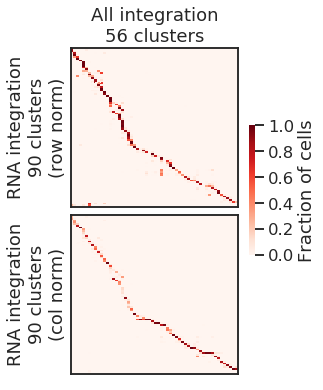

In [239]:
plot_5_version2()

In [240]:
# assigning each RNA integration cluster to 1 joint cluster

### Compare numbers 
Confusion matrix ATAC vs integrated

In [241]:
atac_data = ['snatac_gene', 
       ]

n_atac = len(df_atac)
n_atac_integrated = len(df[df['modality'].isin(atac_data)])
print(n_atac, n_atac_integrated)
cells_atac_shared = np.intersect1d(df_atac['cell_id'].values, df['cell_id'].values)
print(len(cells_atac_shared))

81196 54844
54844


In [242]:
X2 = pd.DataFrame(index=cells_atac_shared)
X2['cluster'] = df.set_index('cell_id').loc[cells_atac_shared, 'joint_cluster_round3'].values
print(X2.shape)
print(len(X2['cluster'].unique()))
X2.head()

(54844, 1)
53


,cluster
snatac_gene_CEMBA171206_3C_AGCGATAGAACCAGGTAAGAGATGTATAGCCT,2-1-1
snatac_gene_CEMBA171206_3C_AGCGATAGAACCAGGTAATGACGTCAGGACGT,4-1-1
snatac_gene_CEMBA171206_3C_AGCGATAGAACCAGGTATAGCCTTAGGCGAAG,2-2-1
snatac_gene_CEMBA171206_3C_AGCGATAGAACCAGGTATAGCCTTATAGAGGC,3-1-2
snatac_gene_CEMBA171206_3C_AGCGATAGAACCAGGTATAGCCTTGTACTGAC,3-2-1


In [243]:
Y2 = pd.DataFrame(index=cells_atac_shared)
Y2['cluster'] = df_atac.set_index('cell_id').loc[cells_atac_shared, 'cluster'].values
print(Y2.shape)
print(len(Y2['cluster'].unique()))
Y2.head()

(54844, 1)
26


,cluster
snatac_gene_CEMBA171206_3C_AGCGATAGAACCAGGTAAGAGATGTATAGCCT,L6.CT
snatac_gene_CEMBA171206_3C_AGCGATAGAACCAGGTAATGACGTCAGGACGT,L23.b
snatac_gene_CEMBA171206_3C_AGCGATAGAACCAGGTATAGCCTTAGGCGAAG,L6.CT
snatac_gene_CEMBA171206_3C_AGCGATAGAACCAGGTATAGCCTTATAGAGGC,L5.IT.b
snatac_gene_CEMBA171206_3C_AGCGATAGAACCAGGTATAGCCTTGTACTGAC,L5.IT.b


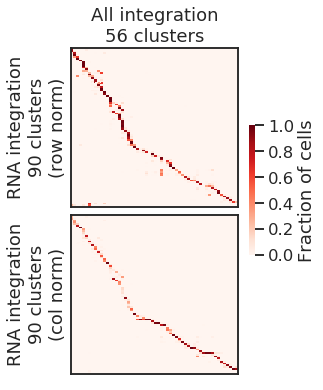

In [244]:
plot_5_version2()

# overlapping score 

In [248]:
shared_clusters = df['joint_cluster_round3'].unique()
shared_clusters

array(['1-1-1', '4-2-1', '4-1-1', '4-2-2', '6-2-1', '1-2-1', '6-4-2',
       '1-2-2', '3-1-2', '3-2-1', '5-3-2', '2-1-2', '7-2-2', '3-1-1',
       '2-1-1', '7-1-2', '5-3-1', '7-2-1', '9-2-2', '6-5-1', '6-1-2',
       '5-4-1', '5-2-1', '9-2-1', '5-1-2', '5-1-1', '6-5-2', '2-2-1',
       '4-2-3', '2-3-1', '6-1-1', '6-6-1', '6-3-1', '6-4-1', '6-3-2',
       '6-5-3', '3-3-1', '5-2-2', '9-1-1', '7-1-1', '2-3-2', '2-3-3',
       '5-2-3', '6-3-3', '10-1-1', '5-5-1', '3-2-2', '8-2-1', '2-2-2',
       '4-1-2', '8-3-1', '8-1-1', '8-1-2', '2-2-3', '2-2-4', '8-3-2'], dtype=object)

In [249]:
df_rna_annot.head()

,cluster_label,cluster_color,subclass_id,subclass_label,subclass_color,class_id,class_label,class_color,cl,cluster_size,size
cluster_id,,,,,,,,,,,
1,Lamp5 Pax6,#DDACC9,1,Lamp5,#DA808C,1,GABAergic,#F05A28,1,700,700
2,Lamp5 Egln3_1,#FF88AD,1,Lamp5,#DA808C,1,GABAergic,#F05A28,2,618,618
3,Lamp5 Egln3_2,#DD8091,1,Lamp5,#DA808C,1,GABAergic,#F05A28,3,814,814
4,Lamp5 Egln3_3,#F08E98,1,Lamp5,#DA808C,1,GABAergic,#F05A28,4,1276,1276
5,Lamp5 Pdlim5_1,#FF7290,1,Lamp5,#DA808C,1,GABAergic,#F05A28,5,1288,1288


In [250]:
conf_mat = pd.crosstab(X['cluster'].values, 
                       Y['cluster'].values,
                      ) #.fillna(0)
conf_mat_ncol = conf_mat.divide(conf_mat.sum(axis=0), axis=1).reindex(shared_clusters, fill_value=0)

conf_mat2 = pd.crosstab(X2['cluster'].values, 
                       Y2['cluster'].values,
                      ) #.fillna(0)
conf_mat_ncol2 = conf_mat2.divide(conf_mat2.sum(axis=0), axis=1).reindex(shared_clusters, fill_value=0)

In [251]:
conf_mat_ncol.sum(axis=0).head()
conf_mat_ncol.columns = [df_rna_annot.loc[clst, 'cluster_label'] for clst in conf_mat_ncol.columns]

In [252]:
print(conf_mat_ncol.columns.values)

['Lamp5 Pax6' 'Lamp5 Egln3_1' 'Lamp5 Egln3_2' 'Lamp5 Egln3_3'
 'Lamp5 Pdlim5_1' 'Lamp5 Pdlim5_2' 'Lamp5 Slc35d3' 'Lamp5 Lhx6'
 'Sncg Col14a1' 'Sncg Slc17a8' 'Sncg Calb1_1' 'Sncg Calb1_2' 'Sncg Npy2r'
 'Vip Sncg' 'Vip Serpinf1_1' 'Vip Serpinf1_2' 'Vip Serpinf1_3'
 'Vip Htr1f_1' 'Vip Gpc3' 'Vip C1ql1' 'Vip Mybpc1_1' 'Vip Mybpc1_2'
 'Vip Mybpc1_3' 'Vip Chat_1' 'Vip Chat_2' 'Vip Igfbp6_1' 'Vip Igfbp6_2'
 'Sst Chodl' 'Sst Penk' 'Sst Myh8_1' 'Sst Myh8_2' 'Sst Myh8_3' 'Sst Htr1a'
 'Sst Etv1_1' 'Sst Pvalb Etv1' 'Sst Crhr2_1' 'Sst Crhr2_2' 'Sst Hpse'
 'Sst Calb2' 'Sst Pvalb Calb2' 'Sst_Pappa' 'Sst C1ql3_1' 'Sst C1ql3_2'
 'Sst Tac2' 'Sst Th_1' 'Sst Th_2' 'Sst Th_3' 'Pvalb Gabrg1' 'Pvalb Egfem1'
 'Pvalb Gpr149' 'Pvalb Kank4' 'Pvalb Calb1_1' 'Pvalb Calb1_2' 'Pvalb Reln'
 'Pvalb Il1rapl2' 'Pvalb Vipr2_1' 'Pvalb Vipr2_2' 'L2/3 IT_1' 'L2/3 IT_2'
 'L2/3 IT_3' 'L5 IT Rspo1_1' 'L5 IT Rspo1_2' 'L5 IT S100b_1'
 'L5 IT S100b_2' 'L5 IT Pld5_1' 'L5 IT Pld5_2' 'L6 IT_1' 'L6 IT_2'
 'L6 IT Car3' 'L5 ET_1' 'L5 E

In [253]:
conf_mat_ncol2.sum(axis=0).head()

col_0
Chodl    1.0
L23.a    1.0
L23.b    1.0
L23.c    1.0
L4       1.0
dtype: float64

In [257]:
overlap = pd.DataFrame(index=conf_mat_ncol.columns, columns=conf_mat_ncol2.columns)
for col_rna in conf_mat_ncol.columns:
    for col_atac in conf_mat_ncol2.columns:
        
        score = np.sum(np.minimum(conf_mat_ncol[col_rna], 
                                    conf_mat_ncol2[col_atac]
                                  ))
        overlap.loc[col_rna, col_atac] = score 
overlap = overlap.fillna(0)
overlap.shape

(90, 26)

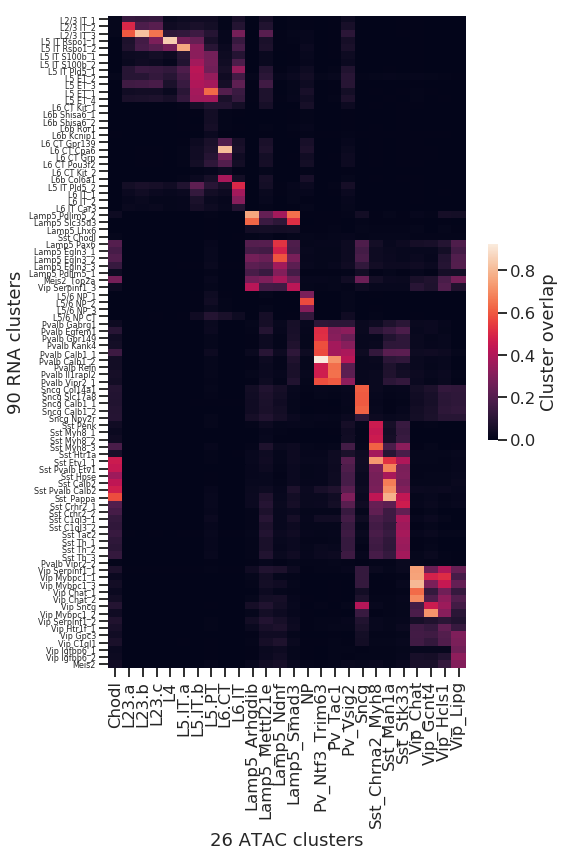

In [262]:
cbar_kws = {
    'orientation': 'vertical', 
    'label': 'Cluster overlap',
    'shrink': 0.3,
}
f = '/cndd/fangming/CEMBA/data/MOp_all/zizhen_integration/mapping_atac_rna.pdf'

fig, ax = plt.subplots(figsize=(8,12))
_X = overlap #(fill_value=0)
_rX, ri, rc = snmcseq_utils.diag_matrix_rows(_X.values, _X.index.values, _X.columns.values)
_rX = pd.DataFrame(_rX, index=ri, columns=rc)
g = sns.heatmap(_rX, cbar_kws=cbar_kws,
                ax=ax, xticklabels=True, yticklabels=True)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
ax.set_xlabel('{} ATAC clusters'.format(_rX.shape[1]))
ax.set_ylabel('{} RNA clusters'.format(_rX.shape[0]))
fig.savefig(f)
plt.show()

overlap_ordered = _rX

In [261]:
# for each row, look for the best column

f = '/cndd/fangming/CEMBA/data/MOp_all/zizhen_integration/mapping_atac_rna.tsv'
_tmp = df_rna_annot.reset_index().set_index('cluster_label').reindex(overlap_ordered.index.values)
_tmp['atac_cluster'] = overlap_ordered.columns.values[np.argmax(overlap_ordered.values, axis=1)]
_tmp = _tmp.reset_index()
_tmp.to_csv(f, sep='\t', header=True, index=False)